In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.signal import argrelmax

In [29]:
input_frame = pd.read_csv("E1-3.1.csv")
# xi = x / (lambda * z)
input_frame["xi"]=input_frame["x"]/0.25
input_frame

,x,Amplitude,xi
0,-200000.000000,0.590818,-800000.000000
1,-199959.996000,0.589447,-799839.983998
2,-199919.991999,0.588078,-799679.967997
3,-199879.987999,0.586709,-799519.951995
4,-199839.983998,0.585340,-799359.935994
...,...,...,...
9995,199839.983998,0.585340,799359.935994
9996,199879.987999,0.586709,799519.951995
9997,199919.991999,0.588078,799679.967997
9998,199959.996000,0.589447,799839.983998


In [30]:
input_frame_sorted = input_frame.sort_values('Amplitude', ascending = False)
input_frame_sorted

,x,Amplitude,xi
2448,-102070.207021,1.000000,-408280.828083
7551,102070.207021,1.000000,408280.828083
5000,20.002000,0.999999,80.008001
4999,-20.002000,0.999999,-80.008001
7550,102030.203020,0.999998,408120.812081
...,...,...,...
400,-183998.399840,0.256297,-735993.599360
4315,-27382.738274,0.256297,-109530.953095
5684,27382.738274,0.256297,109530.953095
8291,131673.167317,0.256297,526692.669267


In [31]:
input_frame_peaks = input_frame.iloc[argrelmax(input_frame["Amplitude"].to_numpy())]
input_frame_peaks

,x,Amplitude,xi
1069,-157235.723572,0.669118,-628942.894289
2448,-102070.207021,1.000000,-408280.828083
3743,-50265.026503,0.669117,-201060.106011
6256,50265.026503,0.669117,201060.106011
7551,102070.207021,1.000000,408280.828083
8930,157235.723572,0.669118,628942.894289


In [32]:
P = input_frame_peaks["xi"].iloc[4] # period
k = 2*np.pi/P
k

1.53893714203627e-05

In [33]:
# One period
input_frame_truncated = input_frame[np.logical_and(input_frame["xi"] >= 0, input_frame["xi"] <= P)]
input_frame_truncated

,x,Amplitude,xi
5000,20.002000,0.999999,80.008001
5001,60.006001,0.999991,240.024002
5002,100.010001,0.999975,400.040004
5003,140.014001,0.999950,560.056006
5004,180.018002,0.999917,720.072007
...,...,...,...
7547,101910.191019,0.999948,407640.764076
7548,101950.195020,0.999972,407800.780078
7549,101990.199020,0.999988,407960.796080
7550,102030.203020,0.999998,408120.812081


In [34]:
n = np.arange(0,3,1)
n

array([0, 1, 2])

In [35]:
a_n = np.array([])
for n_val in tqdm(n):
    a_n = np.append(a_n, 2/P * 160 * np.sum(input_frame_truncated["Amplitude"] * np.cos(k * n_val * input_frame["xi"])))
a_n

100%|██████████| 3/3 [00:00<00:00, 333.48it/s]


array([1.10483216, 0.16790381, 0.28234016])

In [36]:
predicted = np.array([])
for xi in tqdm(input_frame["xi"]):
    predicted = np.append(predicted, a_n[0]/2 + np.sum(a_n[1:] * np.cos(k * xi * n[1:])))
predicted

100%|██████████| 10000/10000 [00:00<00:00, 26385.29it/s]


array([0.96134149, 0.96055524, 0.95976204, ..., 0.95976204, 0.96055524,
       0.96134149])

In [37]:
input_frame["Predicted"] = predicted
input_frame

,x,Amplitude,xi,Predicted
0,-200000.000000,0.590818,-800000.000000,0.961341
1,-199959.996000,0.589447,-799839.983998,0.960555
2,-199919.991999,0.588078,-799679.967997,0.959762
3,-199879.987999,0.586709,-799519.951995,0.958962
4,-199839.983998,0.585340,-799359.935994,0.958155
...,...,...,...,...
9995,199839.983998,0.585340,799359.935994,0.958155
9996,199879.987999,0.586709,799519.951995,0.958962
9997,199919.991999,0.588078,799679.967997,0.959762
9998,199959.996000,0.589447,799839.983998,0.960555


([<matplotlib.axis.YTick at 0x216665bad30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

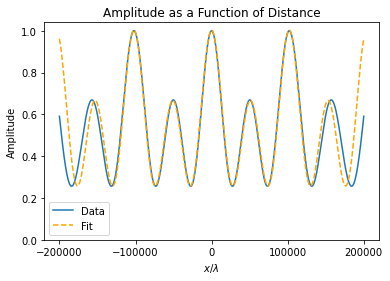

In [38]:
plt.plot(input_frame["x"], input_frame["Amplitude"], label = "Data")
plt.plot(input_frame["x"], input_frame["Predicted"], color = "orange", linestyle = "dashed", label = "Fit")
plt.xlabel("$x/\\lambda$")
plt.ylabel("Amplitude")
plt.title("Amplitude as a Function of Distance")
plt.legend()
plt.xticks(np.arange(-200000,200001,100000))
plt.yticks(np.linspace(0,1,6))

([<matplotlib.axis.YTick at 0x21666644f60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

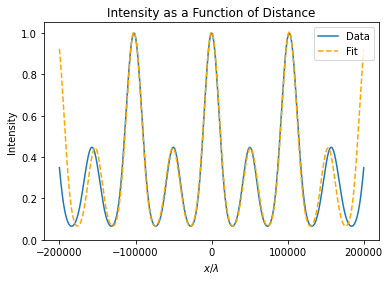

In [39]:
plt.plot(input_frame["x"], input_frame["Amplitude"]**2, label = "Data")
plt.plot(input_frame["x"], input_frame["Predicted"]**2, color = "orange", linestyle = "dashed", label = "Fit")
plt.xlabel("$x/\\lambda$")
plt.ylabel("Intensity")
plt.title("Intensity as a Function of Distance")
plt.legend()
plt.xticks(np.arange(-200000,200001,100000))
plt.yticks(np.linspace(0,1,6))

([<matplotlib.axis.YTick at 0x216677b2400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

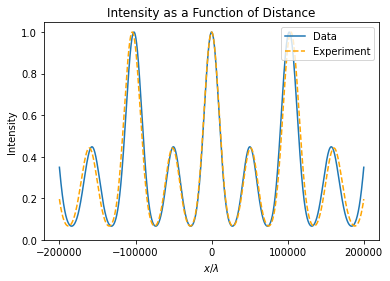

In [43]:
data = pd.read_csv("E1-3.1.csv")
experiment = pd.read_csv("data.csv")
plt.plot(data["x"], data["Amplitude"]**2, label = "Data")
plt.plot(experiment["x"], experiment["Amplitude"]**2, color = "orange", linestyle = "dashed", label = "Experiment")
plt.xlabel("$x/\\lambda$")
plt.ylabel("Intensity")
plt.title("Intensity as a Function of Distance")
plt.legend(loc = "upper right")
plt.xticks(np.arange(-200000,200001,100000))
plt.yticks(np.linspace(0,1,6))